# Data Notebook
General notebook to create our dataloader

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/c147_project')

Mounted at /content/drive


In [ ]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/content/drive/My Drive/c147_project/data')
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

In [ ]:
X_train_valid.shape

(2115, 22, 1000)

In [ ]:
y_train_valid = y_train_valid - 769
y_test = y_test - 769

(529, 22, 100)
(513, 22, 100)
(543, 22, 100)
(530, 22, 100)


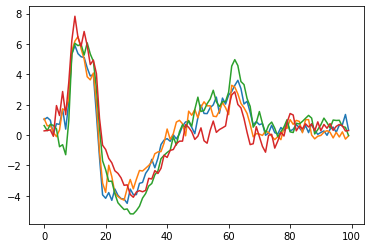

In [ ]:
for i in range(4):
  action0 = X_train_valid[np.where(y_train_valid == i)]
  action0 = action0[:, :, :600:6]
  print(action0.shape)
  plt.plot(np.mean(action0, axis=(0,1)))

In [ ]:
np.vstack([X_train_valid[:, :, ::4], X_train_valid[:, :, 1::4]]).shape


(4230, 22, 250)

In [ ]:
from torch.utils.data import Dataset
import numpy as np
import torch

def moving_average(x, w):
    """
    Simple 1d moving average using numpy

    :input x: 1d np array
    :input w: size of moving average filter
    returns np array with applied moving average
    """
    return np.convolve(x, np.ones(w), 'valid') / w


class eegData(Dataset):
    """
    PyTorch style dataset to be loaded into torch data loader for training

    provides simple functionality

    """
    def __init__(self, data_file_name, label_file_name, device=torch.device('cpu'), preprocessing_params={}):
        """
        :input data_file_name: file path of the data
        :input label_file_name: file path of the labels
        :input validation_size: size of validation (percentage given to validation)
        :input device: specify if CUDA or GPU
        :input preprocessing_params:
            'subsample': int on the size of step of the subsampling
            'mov_avg': int on the size of the moving average window
            'trim': how many of the last indices will be trimmed off
        """
        subsample = preprocessing_params.get('subsample', 1) # we can increase our trial count
        mov_avg_window = preprocessing_params.get('mov_avg', 1) # limit ourselves to 2115
        trimming = preprocessing_params.get('trim', 0) # how much you want to trim
        eeg_data = np.load(data_file_name)
        label_data = np.load(label_file_name) - 769
        self.device = device
        

        # remove the last x amount of time steps
        trimmed_indices = eeg_data.shape[2] - trimming 
        eeg_data = eeg_data[:, :, :trimmed_indices].copy()

        #begin_subsample
        stack_eeg_data = []
        stack_label_data = []
        for i in range(subsample):
            sampled_eeg_data = eeg_data[:, :, i::subsample].copy()
            print(sampled_eeg_data.shape)
            stack_label_data.append(label_data.copy())
            stack_eeg_data.append(sampled_eeg_data)


        eeg_data = np.vstack(stack_eeg_data)
        label_data = np.concatenate(stack_label_data)
        # begin applying moving_average
        eeg_data = np.apply_along_axis(func1d=moving_average, axis=2, arr=eeg_data, w=mov_avg_window)


        


        self.eeg_data = torch.from_numpy(eeg_data).float().to(self.device)
        self.label_data = torch.from_numpy(label_data).float().long().to(self.device)
        self.mov_avg_window = mov_avg_window 
        self.trim = trimming 
        self.sampling = subsample

    def __len__(self):
        assert self.eeg_data.shape[0] == self.label_data.shape[0]
        return self.eeg_data.shape[0]


    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.numpy()

        sample = {}
        sample['data'] = self.eeg_data[idx]
        sample['label'] = self.label_data[idx]

        return sample









In [ ]:
os.chdir('/content/drive/My Drive/c147_project/data')
test_dataset = eegData('X_train_valid.npy', 'y_train_valid.npy', preprocessing_params={'trim': 400, 'subsample':6})

(2115, 22, 100)
(2115, 22, 100)
(2115, 22, 100)
(2115, 22, 100)
(2115, 22, 100)
(2115, 22, 100)


tensor(2)


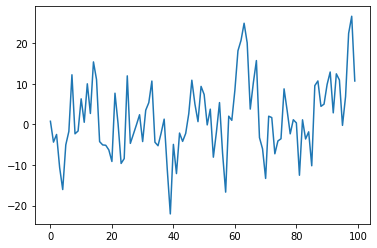

In [ ]:
plt.plot(np.mean(test_dataset[0]['data'].detach().cpu().numpy(), axis=0))
print(test_dataset[0]['label'])

In [ ]:
test_trial = X_train_valid[30]

(22, 100)


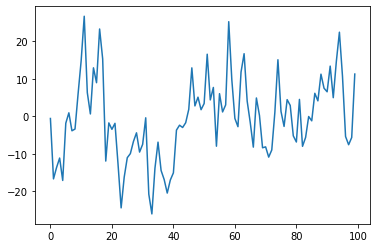

In [ ]:
a = test_trial[:, 0:600:6]
print(a.shape)

plt.plot(np.mean(a, axis=0))

In [ ]:
np.where(y_train_valid == 771)

(array([   0,    6,   13,   24,   30,   40,   42,   47,   49,   50,   54,
          62,   63,   67,   69,   85,   86,   87,   89,   90,   95,  102,
         104,  105,  108,  111,  112,  115,  116,  120,  124,  125,  131,
         132,  133,  135,  139,  143,  159,  161,  165,  166,  167,  175,
         177,  180,  185,  192,  198,  199,  201,  202,  204,  206,  209,
         213,  217,  218,  221,  223,  225,  230,  235,  238,  249,  251,
         258,  262,  270,  277,  282,  284,  285,  298,  301,  302,  305,
         306,  307,  311,  312,  313,  315,  317,  318,  325,  326,  327,
         328,  331,  333,  339,  345,  349,  357,  362,  363,  376,  382,
         383,  384,  395,  406,  413,  416,  419,  423,  432,  441,  442,
         453,  455,  456,  458,  459,  472,  474,  482,  489,  490,  493,
         494,  497,  501,  502,  504,  507,  511,  518,  520,  522,  523,
         526,  527,  538,  544,  545,  546,  547,  550,  552,  559,  566,
         568,  570,  571,  572,  580, 